# YOLOX detections submission made on COTS dataset (PART 2 - DETECTION)

This notebook shows how to detect starfish objects (COTS dataset) using YOLOX ON  Kaggle. First part - Building Cutom Model on Kaggle using YOLOX I implmeneted in notebook called [YoloX full training pipeline for COTS dataset](https://www.kaggle.com/remekkinas/yolox-full-training-pipeline-for-cots-dataset). It could be good starting point for build own custom model based on YOLOX detector. Full github repository you can find here - [YOLOX](https://github.com/Megvii-BaseDetection/YOLOX)

<div align = 'center'><img src='https://github.com/Megvii-BaseDetection/YOLOX/raw/main/assets/logo.png'/></div>

<div class="alert alert-success" role="alert">
This work consists of two parts:     
    <ul>
        <li> <a href="https://www.kaggle.com/remekkinas/yolox-full-training-pipeline-for-cots-dataset">YoloX full training pipeline for COTS dataset</a></li>
        <li> YOLOX detections submission made on COTS dataset</li>
    </ul>
    
</div>

<div class="alert alert-warning" role="alert"><strong><ul><li>This is DEOMO only! What does it mean? Inference is made so far on weak model - trained only on 20 epochs.</li><li>I really appreciate if you <u>vote on both of these notebooks</u> - thank you! I just share my work to make competition fun and more interesting.</li></ul> </strong></div>



In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import torch
import importlib
import cv2 
import pandas as pd

from PIL import Image
from IPython.display import display

### INSTALL YOLOX 
<div class="alert alert-warning" role="alert"><strong>It unfortunately requires a lot of Kaggle enviroment hacking :) due to competition limitation - no internet access during submission.</strong></div>

In [2]:
# download required packages - first time when I created database (https://www.kaggle.com/remekkinas/yolox-cots-models) with required moduls for YOLOX
# don't use this section of code until Kaggle doesn't change something in the environment (!!)


#%mkdir /kaggle/working/yolox-dep
#!pip download pip -d "/kaggle/working/yolox-dep"
#!pip download loguru -d "/kaggle/working/yolox-dep"
#!pip download ninja -d "/kaggle/working/yolox-dep"
#!pip download onnx=="1.8.1" -d "/kaggle/working/yolox-dep"
#!pip download onnxruntime=="1.8.0" -d "/kaggle/working/yolox-dep"
#!pip download onnxoptimizer>="0.2.5" -d "/kaggle/working/yolox-dep"
#!pip download thop -d "/kaggle/working/yolox-dep"
#!pip download tabulate -d "/kaggle/working/yolox-dep"
#!pip download onnx-simplifier==0.3.5 -d "/kaggle/working/yolox-dep"

In [3]:
# Copy YOLOX and required modules from local repository (Kaggle dataset -> https://www.kaggle.com/remekkinas/yolox-cots-models)
%cp -r /kaggle/input/yolox-cots-models /kaggle/working/
%cd /kaggle/working/yolox-cots-models/yolox-dep

/kaggle/working/yolox-cots-models/yolox-dep


In [4]:
# Install YOLOX required modules

!pip install pip-21.3.1-py3-none-any.whl -f ./ --no-index
!pip install loguru-0.5.3-py3-none-any.whl -f ./ --no-index
!pip install ninja-1.10.2.3-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl -f ./ --no-index
!pip install onnx-1.8.1-cp37-cp37m-manylinux2010_x86_64.whl -f ./ --no-index
!pip install onnxruntime-1.8.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl -f ./ --no-index
!pip install onnxoptimizer-0.2.6-cp37-cp37m-manylinux2014_x86_64.whl -f ./ --no-index
!pip install thop-0.0.31.post2005241907-py3-none-any.whl -f ./ --no-index
!pip install tabulate-0.8.9-py3-none-any.whl -f ./ --no-index
#!pip install onnx-simplifier-0.3.6.tar.gz -f ./ --no-index

Looking in links: ./
Processing ./pip-21.3.1-py3-none-any.whl
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
Looking in links: ./
Processing ./loguru-0.5.3-py3-none-any.whl
Looking in links: ./
Processing ./ninja-1.10.2.3-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl
Looking in links: ./
Processing ./onnx-1.8.1-cp37-cp37m-manylinux2010_x86_64.whl
Looking in links: ./
Processing ./onnxruntime-1.8.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
Looking in links: ./
Processing ./onnxoptimizer-0.2.6-cp37-cp37m-manylinux2014_x86_64.whl
Looking in links: ./
Processing ./thop-0.0.31.post2005241907-py3-none-any.whl
Looking in links: ./
Processing ./tabulate-0.8.9-py3-none-any.whl
tabulate is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [5]:
# Install YOLOX
%cd /kaggle/working/yolox-cots-models/YOLOX
!pip install -r requirements.txt
!pip install -v -e . 

/kaggle/working/yolox-cots-models/YOLOX
Using pip 21.3.1 from /opt/conda/lib/python3.7/site-packages/pip (python 3.7)
Obtaining file:///kaggle/working/yolox-cots-models/YOLOX
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-27gwti4f/yolox.egg-info
  writing /tmp/pip-pip-egg-info-27gwti4f/yolox.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-27gwti4f/yolox.egg-info/dependency_links.txt
  writing top-level names to /tmp/pip-pip-egg-info-27gwti4f/yolox.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-27gwti4f/yolox.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-pip-egg-info-27gwti4f/yolox.egg-info/SOURCES.txt'
  adding license file 'LICENSE'
  writing manifest file '/tmp/pip-pip-egg-info-27gwti4f/yolox.egg-info/SOURCES.txt'
  Preparing metadata (setup.py) ... done
  Running setup.py develop for yolox
    Running command /opt/conda/bin/python3.7 -c 'import io, os, sys, setuptools, tokenize; sy

In [6]:
# Install CocoAPI tool
%cd /kaggle/working/yolox-cots-models/yolox-dep/cocoapi/PythonAPI

!make
!make install
!python setup.py install

/kaggle/working/yolox-cots-models/yolox-dep/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/opt/conda/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /kaggle/working/yolox-cots-models/yolox-dep/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
gcc -pthread -B /opt/conda/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/opt/conda/lib/python3.7/site-packages/numpy/core/include -I../common -I/opt/conda/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7/../common/maskApi.o -Wno-cpp -Wno-unused-function -

In [7]:
import pycocotools

### TEST MODEL - MAKE INFERENCE ON SAMPLE DATA


In [8]:
%cd /kaggle/working/yolox-cots-models/YOLOX

CHECKPOINT_FILE = '/kaggle/working/yolox-cots-models/yx_l_003.pth'

/kaggle/working/yolox-cots-models/YOLOX


In [9]:
config_file_template = '''

#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Copyright (c) Megvii, Inc. and its affiliates.

import os

from yolox.exp import Exp as MyExp


class Exp(MyExp):
    def __init__(self):
        super(Exp, self).__init__()
        self.depth = 1
        self.width = 1
        self.exp_name = os.path.split(os.path.realpath(__file__))[1].split(".")[0]
        self.num_classes = 1

'''

with open('cots_config.py', 'w') as f:
    f.write(config_file_template)

In [10]:
from yolox.utils import postprocess
from yolox.data.data_augment import ValTransform

COCO_CLASSES = (
  "starfish",
)

# get YOLOX experiment
current_exp = importlib.import_module('cots_config')
exp = current_exp.Exp()

# set inference parameters
test_size = (800, 1280)
num_classes = 1
confthre = 0.5
nmsthre = 0.4


# get YOLOX model
model = exp.get_model()
model.cuda()
model.eval()

# get custom trained checkpoint
ckpt_file = CHECKPOINT_FILE
ckpt = torch.load(ckpt_file, map_location="cpu")
model.load_state_dict(ckpt["model"])

<All keys matched successfully>

In [11]:
def yolox_inference(img, model, test_size): 
    bboxes = []
    bbclasses = []
    scores = []
    
    preproc = ValTransform(legacy = False)

    tensor_img, _ = preproc(img, None, test_size)
    tensor_img = torch.from_numpy(tensor_img).unsqueeze(0)
    tensor_img = tensor_img.float()
    tensor_img = tensor_img.cuda()

    with torch.no_grad():
        outputs = model(tensor_img)
        outputs = postprocess(
                    outputs, num_classes, confthre,
                    nmsthre, class_agnostic=True
                )

    if outputs[0] is None:
        return [], [], []
    
    outputs = outputs[0].cpu()
    bboxes = outputs[:, 0:4]

    bboxes /= min(test_size[0] / img.shape[0], test_size[1] / img.shape[1])
    bbclasses = outputs[:, 6]
    scores = outputs[:, 4] * outputs[:, 5]
    
    return bboxes, bbclasses, scores

In [12]:
def draw_yolox_predictions(img, bboxes, scores, bbclasses, confthre, classes_dict):
    for i in range(len(bboxes)):
            box = bboxes[i]
            cls_id = int(bbclasses[i])
            score = scores[i]
            if score < confthre:
                continue
            x0 = int(box[0])
            y0 = int(box[1])
            x1 = int(box[2])
            y1 = int(box[3])

            cv2.rectangle(img, (x0, y0), (x1, y1), (0, 255, 0), 2)
            cv2.putText(img, '{}:{:.1f}%'.format(classes_dict[cls_id], score * 100), (x0, y0 - 3), cv2.FONT_HERSHEY_PLAIN, 0.8, (0,255,0), thickness = 1)
    return img

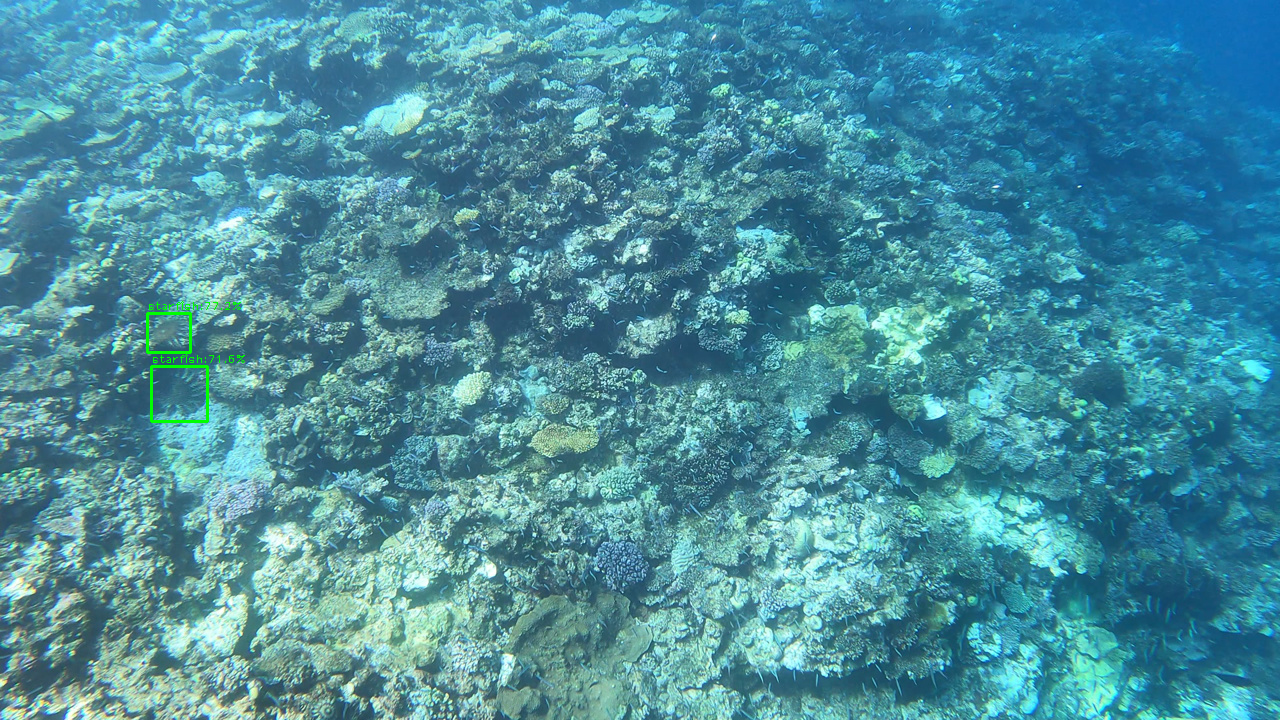

In [13]:
TEST_IMAGE_PATH = "/kaggle/input/tensorflow-great-barrier-reef/train_images/video_0/9674.jpg"
img = cv2.imread(TEST_IMAGE_PATH)

# Get predictions
bboxes, bbclasses, scores = yolox_inference(img, model, test_size)

# Draw predictions
out_image = draw_yolox_predictions(img, bboxes, scores, bbclasses, confthre, COCO_CLASSES)

# Since we load image using OpenCV we have to convert it 
out_image = cv2.cvtColor(out_image, cv2.COLOR_BGR2RGB)
display(Image.fromarray(out_image))

## SUBMIT PREDICTION TO COMPETITION

In [14]:
%cd /kaggle/working/

/kaggle/working


In [15]:
import greatbarrierreef

env = greatbarrierreef.make_env()   # initialize the environment
iter_test = env.iter_test()  

In [16]:
submission_dict = {
    'id': [],
    'prediction_string': [],
}

for (image_np, sample_prediction_df) in iter_test:
 
    bboxes, bbclasses, scores = yolox_inference(image_np[:,:,::-1], model, test_size)
    
    predictions = []
    for i in range(len(bboxes)):
        box = bboxes[i]
        cls_id = int(bbclasses[i])
        score = scores[i]
        if score < confthre:
            continue
        x_min = int(box[0])
        y_min = int(box[1])
        x_max = int(box[2])
        y_max = int(box[3])
        
        bbox_width = x_max - x_min
        bbox_height = y_max - y_min
        
        predictions.append('{:.2f} {} {} {} {}'.format(score, x_min, y_min, bbox_width, bbox_height))
    
    prediction_str = ' '.join(predictions)
    sample_prediction_df['annotations'] = prediction_str
    env.predict(sample_prediction_df)

    print('Prediction:', prediction_str)

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.
Prediction: 
Prediction: 
Prediction: 


In [17]:
sub_df = pd.read_csv('submission.csv')
sub_df.head()

,index,annotations
0,0,NaN
1,1,NaN
2,2,NaN


<div class="alert alert-success" role="alert">
    Find this notebook helpful? :) Please give me a vote ;) Thank you
 </div>